In [1]:
#1 Input đi qua, 2 Model sẽ tính toán ra cho ra 3 Output
#Ví dụ
#Dự báo, phân loại, Gọm cụm, Luật kết hợp
#Các phương pháp: học có giám sát, học bán giám giác
import pandas as pd

# Đường dẫn đến tệp CSV
file_path = 'dulieuxettuyendaihoc.csv'

# Đọc tệp CSV vào DataFrame
df = pd.read_csv(file_path)

# Hiển thị một số dòng đầu của DataFrame
df.head()

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [2]:
df.rename(columns={'TOANLOGICPHANTICH':'LOGIC','GIAIQUYETVANDE':'UNGXU','DINHHUONGNGHENGHIEP':'HUONGNGHIEP'},inplace=True)
df.head()

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,LOGIC,UNGXU,KT,NGAYTHI,HUONGNGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [3]:
df[['T5','T6']].head(5)

,T5,T6
0,7.4,6.9
1,3.0,4.0
2,4.8,5.7
3,6.1,7.4
4,6.8,8.0


In [4]:
#Sinh viên tự khám phá sự ảnh hưởng của T6 đến điểm thi LOGIC
#Hỏi nếu T6 = 6.0 thì dự báo đi thi LOGIC được bao nhiêu
import statsmodels.api as sm


#adding a constant
X_with_constant = sm.add_constant(df[["T5"]].values)


y = df[['T6']].values


#performing the regression
result = sm.OLS(y, X_with_constant).fit()


# Result of statsmodels
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     151.0
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.48e-21
Time:                        14:40:28   Log-Likelihood:                -125.76
No. Observations:                 100   AIC:                             255.5
Df Residuals:                      98   BIC:                             260.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1130      0.402      5.257      0.0

In [5]:
df[['T5','T6']].corr()

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


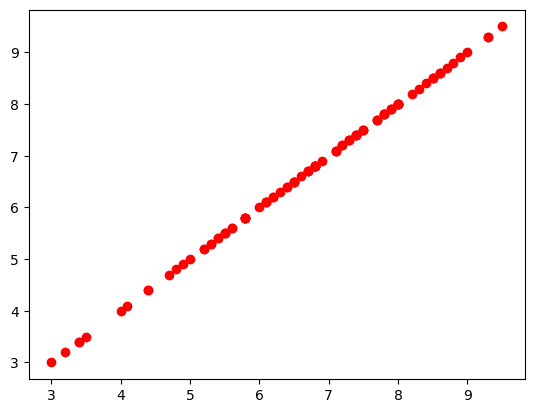

In [6]:
import matplotlib.pyplot as plt
# xây dựng được mô hình tương quan giữa T5 và T6
plt.plot(df[['T5']][0:],df[['T5']][0:],'ro' )
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
#tập dữ liệu
x=df[['T5']].values
y=df[['T6']].values
#chia tách ra training và testing
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=16) #random_state có thể thay đổi
#xây dụng mô hình hồi quy
#T6=A0+A1*T5+epsilon
from sklearn import linear_model

model=linear_model.LinearRegression()
model.fit(x_train,y_train)
#sinh viên xác định giá trị tương ứng với gì
print(model.intercept_)

print(model.coef_)
#=> T6=2.152+0.711*T5+epsilon

[2.15188873]
[[0.71126425]]


In [10]:
#Residual
#vẽ residual bằng excel
x_train[:]

array([[5.5],
       [8.5],
       [8.9],
       [4.9],
       [8. ],
       [6.8],
       [7.4],
       [8. ],
       [6.2],
       [6. ],
       [7.2],
       [7.1],
       [5.8],
       [4.8],
       [7.3],
       [7.1],
       [7.8],
       [7.9],
       [5.8],
       [3.4],
       [7.7],
       [7.5],
       [5.3],
       [6.7],
       [9.5],
       [6.1],
       [4.7],
       [9.3],
       [5.5],
       [5.4],
       [6.9],
       [6.1],
       [8.5],
       [7.3],
       [5.8],
       [4.4],
       [3. ],
       [7.9],
       [6.2],
       [7.8],
       [9.3],
       [5.6],
       [6.8],
       [6.8],
       [6.5],
       [8. ],
       [7.8],
       [7.8],
       [3.4],
       [5.5],
       [6.5],
       [6.7],
       [8.6],
       [7.4],
       [6.8],
       [7.5],
       [3.2],
       [7.7],
       [4.4],
       [8.7],
       [8.3],
       [7.4],
       [6.4],
       [5.2],
       [6.4],
       [8. ],
       [7.9],
       [9. ],
       [6.7],
       [6.6],
       [5.8],
      

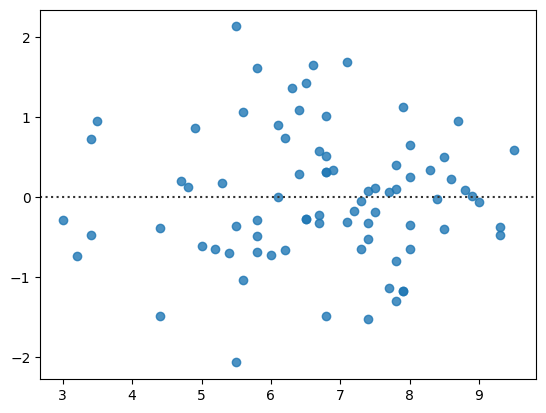

In [11]:
#vẽ bằng python
import matplotlib.pyplot as plt
import seaborn as sns
sns.residplot(x=x_train, y=y_train)
plt.show()

In [12]:
#Đánh giá mô hình
#Tính toán MAE, MSE, RMSE trên các tập training và test để đánh giá mô hinh
# đánh giá mô hình
import numpy as np
from sklearn import metrics
y_test_pred = model.predict(y_test)
print('R-Squared score: ', metrics.r2_score(y_test,y_test_pred)) #có thể dùng train
print('Score:',model.score(x_test,y_test))
y_test_pred = model.predict(y_test)
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error: ', metrics.mean_absolute_error(y_test,y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_test_pred)))
print('Mean Absolute Percentage Error: ', metrics.mean_absolute_percentage_error(y_test,y_test_pred))

R-Squared score:  0.9074405778120247
Score: 0.52486140058752
Mean Absolute Error:  0.33934524627399343
Mean Squared Error:  0.33934524627399343
Root Mean Squared Error:  0.5825334722348523
Mean Absolute Percentage Error:  0.05935921494983661


In [13]:
#Lưu trữ mô hình đã huấn luyện xuống ổ đĩa
#model_linear_regression.sav
import pickle
pickle.dump(model, open('model_liner_regression.sav', 'wb'))

In [14]:
import pickle 
#load  model tu storage

loaded_model = pickle.load(open('model_liner_regression.sav','rb'))

vT5 = float(input('Nhap T5: '))

predicted_T6 = loaded_model.predict([[vT5]])

print(f'Du bao diem T6 la: {predicted_T6}')


Du bao diem T6 la: [[6.41947422]]
